# Object Detection in Google Colab with Fizyr Retinanet

Jupyter notebook providing steps to train a Keras/Tensorflow model for object detection with custom dataset.

It runs in Google Colab using [Fizyr implementation](https://github.com/fizyr/keras-retinanet) of RetinaNet in Keras.

Requirements are only dataset images and annotations file made in [LabelImg](https://github.com/tzutalin/labelImg).

Colab Runtime type: Python3, GPU enabled.

# Environment Setup
Download and install in Colab required packages and import libraries.

In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 29.78 MiB/s, done.
Resolving deltas: 100% (4201/4201), done.


In [2]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168001 sha256=a166b262dc276147cfbebc2825d9095e6b2b4a6458673ccb31e96c9addec11af
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=d0b47a0be208b65f93aa152dd6fdae9079eb8c9fb2d7156d542b80811095797c
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [3]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [4]:
import os
import shutil
import zipfile
import urllib
import urllib.request
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files

# Making Dataset

We will be using HyperLabel to create our dataset. You can watch the following tutorial video about how to use HyperLabel and tag images with it.

https://www.youtube.com/embed/R56Ck3tElIs

Once all of your images are tagged, its time to export the labels and data in Pascal VOC format. Goto the `review` tab/section and click on the export button. From the export menu, choose `Object Detection` and select Pascal VOC and click on export. It will take some time to export the data, once exported you should be able to see multiple folders, but we are interested in two i.e., `Annotations` and `JPEGImages` folder.

Now created a new folder, name it `dataset`. Copy all the contents of `Annotations` folder and `JPEGImages` folder inside `dataset` folder and then create a zip archive of this folder.

Upload this zip archive to your Google drive and get the ID. To locate the File ID, right click on the name of the file, choose the Get Shareable Link option, and turn on Link Sharing if needed (you can turn it off later). You will see the link with a combination of numbers and letters at the end, and what you see after id =   is the File ID.

https://drive.google.com/open?id=***ThisIsFileID*** 

If your file is already open in a browser, you can obtain File ID from its link:

https://docs.google.com/spreadsheets/d/***ThisIsFileID***/edit#gid=123456789 

In [ ]:
# ! git clone https://github.com/omrimanor7/TrafficSignDetection2021.git

In [15]:
CLASSES_FILE = '/content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/classes.csv'
ANNOTATIONS_FILE = '/content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/annotations.csv'

# Training Model

Download pretrained model and run training.

In the next cell choose one option:

1.   download Fizyr Resnet50 pretrained model
2.   download your custom pretrained model, to continue previous training epochs

In the last cell optionally export trained model to Google Drive.


In [7]:
# PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
# URL_MODEL = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

#### OPTION 2: DOWNLOAD CUSTOM PRETRAINED MODEL FROM GOOGLE DRIVE. CHANGE DRIVE_MODEL VALUE. USE THIS TO CONTINUE PREVIOUS TRAINING EPOCHS ####
drive.mount('/content/gdrive')
DRIVE_MODEL = '/content/gdrive/MyDrive/EE Final Project/Models/detection_model.h5'
shutil.copy(DRIVE_MODEL, './snapshots/resnet50_csv_01.h5')

# print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [ ]:
# !keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 1 --steps 900 --epochs 1 csv {ANNOTATIONS_FILE} {CLASSES_FILE}

In [ ]:
SNAPSHOT = './snapshots/resnet50_csv_01.h5'

In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --snapshot {SNAPSHOT} --batch-size 1 --steps 300 --epochs 1 csv {ANNOTATIONS_FILE} {CLASSES_FILE}


2021-01-23 20:48:44.210893: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Loading model, this may take a second...
2021-01-23 20:48:47.000512: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-23 20:48:47.001522: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-23 20:48:47.037499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-01-23 20:48:47.038061: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-01-23 20:48:47.038098: I tensorflow/s

In [ ]:
#### OPTIONAL: EXPORT TRAINED MODEL TO DRIVE ####
drive.mount('/content/gdrive')
COLAB_MODEL = './snapshots/resnet50_csv_01.h5'
DRIVE_DIR = '/content/gdrive/My Drive/EE Final Project/ResNetModels/'
# shutil.copy(COLAB_MODEL, DRIVE_DIR)
DRIVE_MODEL = DRIVE_DIR + 'resnet50_csv_01.h5'
shutil.copy(DRIVE_MODEL, COLAB_MODEL)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'./snapshots/resnet50_csv_01.h5'

In [ ]:
import sys
import runpy
sys.argv = f"keras_retinanet/bin/train.py --freeze-backbone --random-transform --snapshot {SNAPSHOT} --batch-size 1 --steps 700 --epochs 1 csv {ANNOTATIONS_FILE} {CLASSES_FILE}".split()
import subprocess

while True:
  subprocess.call(sys.argv)
  shutil.copy(COLAB_MODEL, DRIVE_DIR)

# Inference
Run inference with uploaded image on trained model.

In [8]:
THRES_SCORE = 0.5

In [9]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.compat.v1.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
tf.compat.v1.keras.backend.set_session(get_session())

In [16]:
model_path = DRIVE_MODEL
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv(CLASSES_FILE,header=None).T.loc[0].to_dict()

/content/gdrive/MyDrive/EE Final Project/Models/detection_model.h5


In [17]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  processing_time = time.time() - start
  print("processing time: ", processing_time)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      
      # print(label)
      
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      print(caption)
      draw_caption(draw, b, caption)
  
  # plt.figure(figsize=(20, 20))
  # plt.axis('off')
  # plt.imshow(draw)
  # plt.show()

  return processing_time
  

In [19]:
# GTSDB


# uploaded = files.upload()
# img_infer = list(uploaded)[0]
# img_inference(img_infer)

test_imgs_indecies = np.random.randint(0, 900, 100)
processing_time = []
for i in test_imgs_indecies:
  img_infer = '/content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/' + str(i).zfill(5)  + '.ppm'
  print('Running inference on: ' + img_infer)
  processing_time.append(img_inference(img_infer))

processing_time = np.array(processing_time)
print('processing time:', processing_time)
print('Avg processing time:', np.mean(processing_time))

Running inference on: /content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/00584.ppm
processing time:  42.906161308288574
Running inference on: /content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/00108.ppm
processing time:  0.12264275550842285
Running inference on: /content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/00501.ppm
processing time:  0.12575674057006836
no_entry_(other) 1.000
keep_right_(mandatory) 1.000
Running inference on: /content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/00013.ppm
processing time:  0.12453579902648926
speed_limit_70_(prohibitory) 0.990
speed_limit_50_(prohibitory) 0.521
Running inference on: /content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/00566.ppm
processing time:  0.12836384773254395
no_overtaking_(prohibitory) 1.000
no_overtaking_(prohibitory) 1.000
Running inference on: /content/gdrive/My Drive/EE Final Project/datasets/GTSDB/FullIJCNN2013/00023.ppm
pro

In [ ]:
# GTSDB


# uploaded = files.upload()
# img_infer = list(uploaded)[0]
# img_inference(img_infer)

test_imgs_indecies = np.random.randint(0, 900, 100)
processing_time = []
for i in test_imgs_indecies:
  img_infer = '/content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/' + str(i).zfill(5)  + '.ppm'
  print('Running inference on: ' + img_infer)
  processing_time.append(img_inference(img_infer))

processing_time = np.array(processing_time)
print('processing time:', processing_time)
print('Avg processing time:', np.mean(processing_time))


Running inference on: /content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/00881.ppm
processing time:  0.18448090553283691
speed_limit_80_(prohibitory) 1.000
speed_limit_80_(prohibitory) 1.000
Running inference on: /content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/00324.ppm
processing time:  0.1741161346435547
Running inference on: /content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/00650.ppm
processing time:  0.1315746307373047
priority_road_(other) 1.000
keep_right_(mandatory) 0.640
Running inference on: /content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/00704.ppm
processing time:  0.13152337074279785
speed_limit_50_(prohibitory) 1.000
Running inference on: /content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/00753.ppm
processing time:  0.11972665786743164
Running inference on: /content/gdrive/My Drive/EE Final Project/GTSDB/FullIJCNN2013/00540.ppm
processing time:  0.12052512168884277
Running inference on: /content/gdrive/My Drive/E

In [ ]:
# chinese


# uploaded = files.upload()
# img_infer = list(uploaded)[0]
# img_inference(img_infer)

test_imgs_indecies = np.random.randint(1, 100, 10)
for i in test_imgs_indecies:
  #img_infer = '/content/gdrive/MyDrive/EE Final Project/chineseDataset/test_image/test (' + str(i)  + ').bmp'
  print('Running inference on: ' + img_infer)
  img_inference(img_infer)




Running inference on: /content/gdrive/MyDrive/EE Final Project/GTSDB/FullIJCNN2013/00003.ppm
processing time:  0.09243059158325195
[[[740.87024   465.45453   766.33374   490.8471   ]
  [736.7064    412.30228   771.29517   444.02048  ]
  [741.6454    442.2972    766.1969    467.37326  ]
  ...
  [ -1.0202551  -1.0202551  -1.0202551  -1.0202551]
  [ -1.0202551  -1.0202551  -1.0202551  -1.0202551]
  [ -1.0202551  -1.0202551  -1.0202551  -1.0202551]]]
no_overtaking_(prohibitory) 1.000
bend_(danger) 0.988
speed_limit_70_(prohibitory) 0.785
no_overtaking_(trucks)_(prohibitory) 0.566


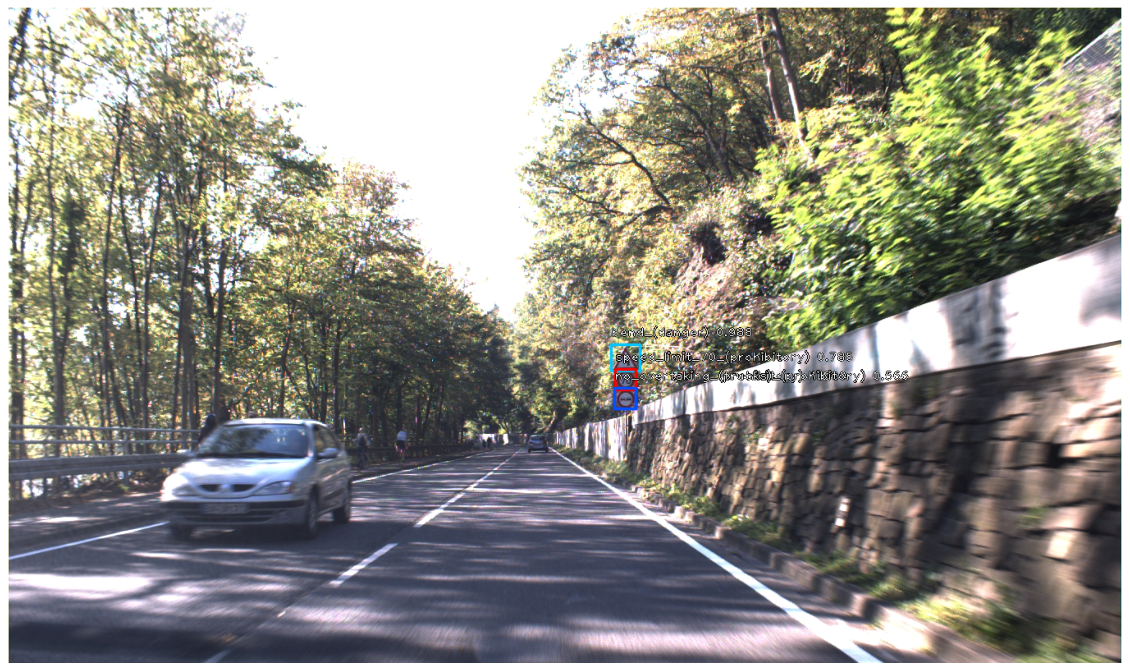

In [ ]:
  img_infer = '/content/gdrive/MyDrive/EE Final Project/GTSDB/FullIJCNN2013/00003.ppm'
  print('Running inference on: ' + img_infer)
  img_inference(img_infer)

# Model Evaluation

In [ ]:
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def get_model_scores(pred_boxes):
    """Creates a dictionary of from model_scores to image ids.
    Args:
        pred_boxes (dict): dict of dicts of 'boxes' and 'scores'
    Returns:
        dict: keys are model_scores and values are image ids (usually filenames)
    """
    model_score={}
    for img_id, val in pred_boxes.items():
        for score in val['scores']:
            if score not in model_score.keys():
                model_score[score]=[img_id]
            else:
                model_score[score].append(img_id)
    return model_score


def calc_iou( gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt= gt_bbox
    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p= pred_bbox
    
    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt> y_bottomright_gt):
        raise AssertionError("Ground Truth Bounding Box is not correct")
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p> y_bottomright_p):
        raise AssertionError("Predicted Bounding Box is not correct",x_topleft_p, x_bottomright_p,y_topleft_p,y_bottomright_gt)
        
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
   
    return intersection_area/union_area



def calc_precision_recall(image_results):
    """Calculates precision and recall from the set of images
    Args:
        img_results (dict): dictionary formatted like:
            {
                'img_id1': {'true_pos': int, 'false_pos': int, 'false_neg': int},
                'img_id2': ...
                ...
            }
    Returns:
        tuple: of floats of (precision, recall)
    """
    true_positive=0
    false_positive=0
    false_negative=0
    for img_id, res in image_results.items():
        true_positive +=res['true_positive']
        false_positive += res['false_positive']
        false_negative += res['false_negative']
        try:
            precision = true_positive/(true_positive+ false_positive)
        except ZeroDivisionError:
            precision=0.0
        try:
            recall = true_positive/(true_positive + false_negative)
        except ZeroDivisionError:
            recall=0.0
    return (precision, recall)


def get_single_image_results(gt_boxes, pred_boxes, iou_thr):
    """Calculates number of true_pos, false_pos, false_neg from single batch of boxes.
    Args:
        gt_boxes (list of list of floats): list of locations of ground truth
            objects as [xmin, ymin, xmax, ymax]
        pred_boxes (dict): dict of dicts of 'boxes' (formatted like `gt_boxes`)
            and 'scores'
        iou_thr (float): value of IoU to consider as threshold for a
            true prediction.
    Returns:
        dict: true positives (int), false positives (int), false negatives (int)
    """
    all_pred_indices= range(len(pred_boxes))
    all_gt_indices=range(len(gt_boxes))
    if len(all_pred_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    if len(all_gt_indices)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    
    gt_idx_thr=[]
    pred_idx_thr=[]
    ious=[]

    for ipb, pred_box in enumerate(pred_boxes):
        pred_box = np.array(pred_box)
        gt_boxes = np.array(gt_boxes)
        
        pred_box_norms = np.sqrt(np.sum(np.abs(pred_box-gt_boxes)**2,axis=-1))
        igb = np.argmin(pred_box_norms)
        iou= calc_iou(gt_boxes[igb], pred_box)
        print("iou ", iou)
        if iou >iou_thr:
            gt_idx_thr.append(igb)
            pred_idx_thr.append(ipb)
            ious.append(iou)
    
    iou_sort = np.argsort(ious)[::1]
    print(iou_sort)
    if len(iou_sort)==0:
        tp=0
        fp=0
        fn=0
        return {'true_positive':tp, 'false_positive':fp, 'false_negative':fn}
    else:
        gt_match_idx=[]
        pred_match_idx=[]
        for idx in iou_sort:
            gt_idx=gt_idx_thr[idx]
            pr_idx= pred_idx_thr[idx]
            # If the boxes are unmatched, add them to matches
            if(gt_idx not in gt_match_idx) and (pr_idx not in pred_match_idx):
                gt_match_idx.append(gt_idx)
                pred_match_idx.append(pr_idx)
        tp= len(gt_match_idx)
        fp= len(pred_boxes) - len(pred_match_idx)
        fn = len(gt_boxes) - len(gt_match_idx)
        print("tp: ",tp,"fp: ",fp,"fn: ",fn)
    return {'true_positive': tp, 'false_positive': fp, 'false_negative': fn}

def  get_avg_precision_at_iou(gt_boxes, pred_bb, iou_thr=0.5):
    
    model_scores = get_model_scores(pred_bb)
    sorted_model_scores= sorted(model_scores.keys())
    # Sort the predicted boxes in descending order (lowest scoring boxes first):
    for img_id in pred_bb.keys():
        
        arg_sort = np.argsort(pred_bb[img_id]['scores'])
        pred_bb[img_id]['scores'] = np.array(pred_bb[img_id]['scores'])[arg_sort].tolist()
        pred_bb[img_id]['boxes'] = np.array(pred_bb[img_id]['boxes'])[arg_sort].tolist()
    pred_boxes_pruned = deepcopy(pred_bb)
    
    precisions = []
    recalls = []
    model_thrs = []
    img_results = {}
    # Loop over model score thresholds and calculate precision, recall
    for ithr, model_score_thr in enumerate(sorted_model_scores[:-1]):
            # On first iteration, define img_results for the first time:
        print("Mode score : ", model_score_thr)
        img_ids = gt_boxes.keys() if ithr == 0 else model_scores[model_score_thr]
        print("img_ids ",img_ids)
        for img_id in img_ids:
               
            gt_boxes_img = gt_boxes[img_id]
            box_scores = pred_boxes_pruned[img_id]['scores']
            start_idx = 0
            for score in box_scores:
                if score <= model_score_thr:
                    pred_boxes_pruned[img_id]
                    start_idx += 1
                else:
                    break 
            # Remove boxes, scores of lower than threshold scores:
            pred_boxes_pruned[img_id]['scores']= pred_boxes_pruned[img_id]['scores'][start_idx:]
            pred_boxes_pruned[img_id]['boxes']= pred_boxes_pruned[img_id]['boxes'][start_idx:]
            # Recalculate image results for this image
            print(img_id)
            img_results[img_id] = get_single_image_results(gt_boxes_img, pred_boxes_pruned[img_id]['boxes'], iou_thr=0.5)
        # calculate precision and recall
        prec, rec = calc_precision_recall(img_results)
        precisions.append(prec)
        recalls.append(rec)
        model_thrs.append(model_score_thr)
    precisions = np.array(precisions)
    recalls = np.array(recalls)
    prec_at_rec = []
    for recall_level in np.linspace(0.0, 1.0, 11):
        try:
            args= np.argwhere(recalls>recall_level).flatten()
            prec= max(precisions[args])
            print(recalls,"Recall")
            print(      recall_level,"Recall Level")
            print(       args, "Args")
            print(       prec, "precision")
        except ValueError:
            prec=0.0
        prec_at_rec.append(prec)
    avg_prec = np.mean(prec_at_rec) 
    return {
        'avg_prec': avg_prec,
        'precisions': precisions,
        'recalls': recalls,
        'model_thrs': model_thrs}


In [ ]:
CHINESE_ANNO_CSV = "/content/gdrive/My Drive/EE Final Project/chineseDataset/chineseAnnotations.csv"


In [ ]:
chinese_annotations_dict = {}

csv_file = open(CHINESE_ANNO_CSV, 'r')

for line in csv_file.readlines():
    line_arr = line.rstrip().split(',')
    
    if line_arr[0] in chinese_annotations_dict:
        img_key = chinese_annotations_dict[line_arr[0]]
    else:
        chinese_annotations_dict[line_arr[0]] = []
        img_key = chinese_annotations_dict[line_arr[0]]

    img_key.append([int(line_arr[1]),int(line_arr[2]),int(line_arr[3]),int(line_arr[4])])

csv_file.close()

print(chinese_annotations_dict)

{'tsd (338).jpg': [[414, 130, 458, 180], [402, 198, 475, 264], [298, 282, 325, 314]], 'tsd (339).jpg': [[436, 186, 491, 249]], 'tsd (340).jpg': [[423, 210, 455, 244]], 'tsd (341).jpg': [[416, 156, 504, 244]], 'tsd (342).jpg': [[454, 163, 504, 200]], 'tsd (343).jpg': [[400, 176, 433, 219]], 'tsd (344).jpg': [[433, 169, 451, 199]], 'tsd (345).jpg': [[433, 162, 465, 195]], 'tsd (346).jpg': [[423, 164, 494, 237]], 'tsd (347).jpg': [[407, 164, 442, 207]], 'tsd (348).jpg': [[402, 112, 460, 170], [463, 113, 518, 171]], 'tsd (349).jpg': [[406, 51, 499, 130], [415, 148, 509, 234], [420, 250, 521, 350]], 'tsd (350).jpg': [[451, 208, 480, 251]], 'tsd (351).jpg': [[477, 230, 511, 267]], 'tsd (352).jpg': [[392, 184, 437, 221], [387, 228, 438, 263], [484, 60, 540, 103], [246, 60, 296, 99]], 'tsd (353).jpg': [[449, 196, 480, 227], [451, 229, 484, 269]], 'tsd (354).jpg': [[433, 217, 469, 256], [424, 186, 465, 215]], 'tsd (355).jpg': [[469, 152, 504, 193], [290, 25, 357, 76], [466, 210, 513, 246]], 'ts

In [ ]:
gtsdb_annotations_dict = {}

csv_file = open(ANNOTATIONS_FILE, 'r')

for line in csv_file.readlines():
    line_arr = line.rstrip().split(',')
    
    if line_arr[0] in gtsdb_annotations_dict:
        img_key = gtsdb_annotations_dict[line_arr[0]]
    else:
        gtsdb_annotations_dict[line_arr[0]] = []
        img_key = gtsdb_annotations_dict[line_arr[0]]

    img_key.append([int(line_arr[1]),int(line_arr[2]),int(line_arr[3]),int(line_arr[4])])

csv_file.close()

print(gtsdb_annotations_dict)

{'00000.ppm': [[774, 411, 815, 446]], '00001.ppm': [[983, 388, 1024, 432], [386, 494, 442, 552], [973, 335, 1031, 390]], '00002.ppm': [[892, 476, 1006, 592]], '00003.ppm': [[742, 443, 765, 466], [742, 466, 764, 489], [737, 412, 769, 443]], '00004.ppm': [[898, 342, 967, 409], [906, 407, 955, 459]], '00005.ppm': [[1172, 164, 1284, 278]], '00006.ppm': [[926, 350, 989, 414]], '00007.ppm': [[825, 406, 864, 445]], '00008.ppm': [[785, 460, 811, 486], [779, 424, 816, 461]], '00009.ppm': [[925, 466, 949, 490]], '00010.ppm': [[1193, 358, 1269, 436]], '00011.ppm': [[720, 338, 770, 398], [710, 265, 780, 342]], '00012.ppm': [[979, 364, 1034, 418]], '00013.ppm': [[1043, 281, 1120, 356]], '00014.ppm': [[712, 492, 732, 511]], '00015.ppm': [[770, 426, 808, 462]], '00016.ppm': [[901, 421, 959, 478]], '00017.ppm': [[908, 302, 1031, 408], [575, 495, 598, 515]], '00018.ppm': [[950, 455, 981, 486]], '00019.ppm': [[838, 366, 896, 422], [845, 423, 888, 465]], '00020.ppm': [[825, 428, 862, 463]], '00021.ppm': 

In [ ]:
def predict_on_img(img_path):
    image = read_image_bgr(img_path)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    
    # correct for image scale
    boxes /= scale

    res = {}
    boxes_1 = []
    scores_1 = []
    
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        
      if score < 0.6:
          break  

      boxes_1.insert(0,box.astype(int))
      scores_1.insert(0,score)
        
    res['boxes'] = boxes_1
    res['scores'] = scores_1
    return res


def build_prediction_on_batch(annotations_dict, path_to_img_dir):
    
    predicted_box = {}
    
    for img_name in annotations_dict:
      #print('Running inference on: ' + img_name)

      if img_name != "hsd (50).bmp":
        try:
          predicted_box[img_name] = predict_on_img(path_to_img_dir + "/" + img_name)
        except FileNotFoundError: 
          continue
      else:
        continue
        
    return predicted_box

In [ ]:
prediction_img_dict_gtsdb = build_prediction_on_batch(gtsdb_annotations_dict, "/content/gdrive/MyDrive/EE Final Project/GTSDB/FullIJCNN2013")

In [ ]:
prediction_img_dict_chinese = build_prediction_on_batch(chinese_annotations_dict, "/content/gdrive/MyDrive/EE Final Project/chineseDataset/test_image")


In [ ]:
chinese_annotations_dict.pop('tsd (38).jpg')

[[924, 767, 1133, 1045],
 [1241, 777, 1420, 1022],
 [1489, 728, 1809, 967],
 [1799, 715, 2113, 996]]

Streaming output truncated to the last 5000 lines.
tp:  2 fp:  0 fn:  2
Mode score :  0.9584706425666809
img_ids  ['00899.ppm']
00899.ppm
Mode score :  0.9598193168640137
img_ids  ['00366.ppm']
00366.ppm
iou  0.8901098901098901
iou  0.8518518518518519
iou  0.96
[1 0 2]
tp:  3 fp:  0 fn:  1
Mode score :  0.9603509306907654
img_ids  ['00431.ppm']
00431.ppm
iou  0.926829268292683
iou  0.9069767441860465
[1 0]
tp:  2 fp:  0 fn:  0
Mode score :  0.9611936211585999
img_ids  ['00023.ppm']
00023.ppm
iou  0.8916047854785478
iou  0.8538801571709234
iou  0.8741308358166596
[1 2 0]
tp:  3 fp:  0 fn:  0
Mode score :  0.9614303708076477
img_ids  ['00785.ppm']
00785.ppm
iou  0.9107420861442657
iou  0.9347826086956522
[0 1]
tp:  2 fp:  0 fn:  2
Mode score :  0.961577832698822
img_ids  ['00174.ppm']
00174.ppm
iou  0.9615384615384616
iou  0.8552036199095022
[1 0]
tp:  2 fp:  0 fn:  1
Mode score :  0.9628487825393677
img_ids  ['00297.ppm']
00297.ppm
Mode score :  0.964458703994751
img_ids  ['00716.ppm']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


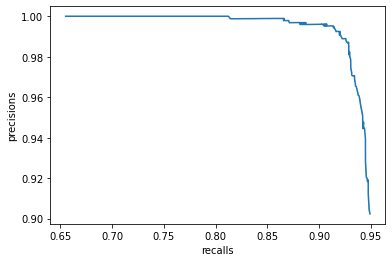

In [ ]:
import seaborn as sns

#avg_precision_chinese = get_avg_precision_at_iou(chinese_annotations_dict, prediction_img_dict_chinese)
#print(avg_precision_chinese)

avg_precision_gtsdb = get_avg_precision_at_iou(gtsdb_annotations_dict, prediction_img_dict_gtsdb)
#print(avg_precision_gtsdb)

avg_precision_gtsdb = pd.DataFrame(avg_precision_gtsdb)

avg_precision_gtsdb

sns.lineplot(avg_precision_gtsdb['recalls'], avg_precision_gtsdb['precisions'], x="Recall", y="Precision")

In [ ]:
#chinese image
#print(chinese_annotations_dict["css (2).bmp"])
#print(prediction_img_dict_chinese["css (50).bmp"])




#print(get_avg_precision_at_iou({"css (2).bmp": chinese_annotations_dict["css (2).bmp"]}, {"css (2).bmp": prediction_img_dict_chinese["css (2).bmp"]}))


#gtsdb image
print(gtsdb_annotations_dict["00003.ppm"])
print("\n")
print(predict_on_img("/content/gdrive/MyDrive/EE Final Project/GTSDB/FullIJCNN2013/00003.ppm"))
print("\n")
print(get_avg_precision_at_iou({'00003.ppm': gtsdb_annotations_dict['00003.ppm']}, {'00003.ppm': prediction_img_dict_gtsdb['00003.ppm']}))

[[742, 443, 765, 466], [742, 466, 764, 489], [737, 412, 769, 443]]


{'boxes': [array([741, 442, 766, 467]), array([736, 412, 771, 444]), array([740, 465, 766, 490])], 'scores': [0.7851918, 0.9882686, 0.9997532]}


Mode score :  0.7851917743682861
img_ids  dict_keys(['00003.ppm'])
00003.ppm
iou  0.8888888888888888
iou  0.7863247863247863
[1 0]
tp:  2 fp:  0 fn:  1
Mode score :  0.9882686138153076
img_ids  ['00003.ppm']
00003.ppm
iou  0.7863247863247863
[0]
tp:  1 fp:  0 fn:  2
[0.66666667 0.33333333] Recall
0.0 Recall Level
[0 1] Args
1.0 precision
[0.66666667 0.33333333] Recall
0.1 Recall Level
[0 1] Args
1.0 precision
[0.66666667 0.33333333] Recall
0.2 Recall Level
[0 1] Args
1.0 precision
[0.66666667 0.33333333] Recall
0.30000000000000004 Recall Level
[0 1] Args
1.0 precision
[0.66666667 0.33333333] Recall
0.4 Recall Level
[0] Args
1.0 precision
[0.66666667 0.33333333] Recall
0.5 Recall Level
[0] Args
1.0 precision
[0.66666667 0.33333333] Recall
0.6000000000000001 Recall Level
[0] A